In [2]:
import os, datetime
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [5]:
# -- data from : https://www.kaggle.com/ronitf/heart-disease-uci

df= pd.read_csv('./datasets/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


/usr/local/Caskroom/miniconda/base/envs/env01/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


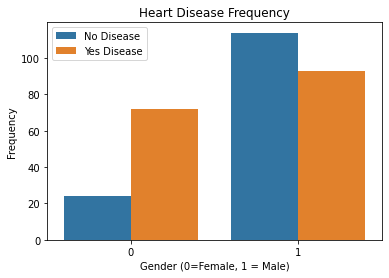

In [9]:
sns.countplot('sex', hue = 'target', data = df)

plt.title('Heart Disease Frequency')
plt.legend(['No Disease','Yes Disease'])

plt.xlabel('Gender (0=Female, 1 = Male)')
plt.ylabel('Frequency')

plt.show()

/usr/local/Caskroom/miniconda/base/envs/env01/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


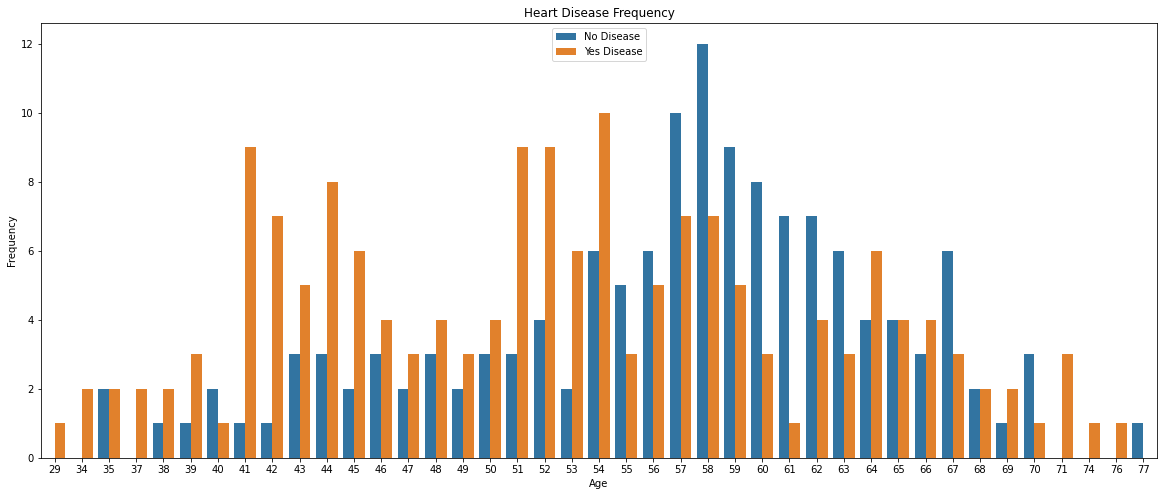

In [11]:
plt.figure(figsize = (20,8))
sns.countplot('age', hue = 'target', data = df)

plt.title('Heart Disease Frequency')
plt.legend(['No Disease','Yes Disease'])

plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

In [12]:
features = df.drop('target', axis = 1)
target = df[['target']]

In [13]:
features.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [15]:
categorical_features = features[[ 'sex', 'cp','fbs', 'restecg', 'slope', 'ca', 'thal','exang']].copy()
categorical_features.head()

,sex,cp,fbs,restecg,slope,ca,thal,exang
0,1,3,1,0,0,0,1,0
1,1,2,0,1,0,0,2,0
2,0,1,0,0,2,0,2,0
3,1,1,0,1,2,0,2,0
4,0,0,0,1,2,0,2,1


In [22]:
numeric_features = features.drop(categorical_features.columns.to_list(),axis=1)

In [24]:
standardScaler = StandardScaler()

numeric_features = pd.DataFrame(standardScaler.fit_transform(numeric_features),
                               columns = numeric_features.columns,
                               index = numeric_features.index)
numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,4.690051e-17,1.001654,-2.797624,-0.757280,0.069886,0.731619,2.496240
trestbps,303.0,-7.035077e-16,1.001654,-2.148802,-0.663867,-0.092738,0.478391,3.905165
chol,303.0,-1.113887e-16,1.001654,-2.324160,-0.681494,-0.121055,0.545674,6.140401
thalach,303.0,-6.800574e-16,1.001654,-3.439267,-0.706111,0.146634,0.715131,2.289429
oldpeak,303.0,2.345026e-17,1.001654,-0.896862,-0.896862,-0.206705,0.483451,4.451851


In [25]:
processed_features = pd.concat([numeric_features, categorical_features], axis = 1, sort = False)
processed_features.head()

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,slope,ca,thal,exang
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,3,1,0,0,0,1,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,2,0,1,0,0,2,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0,1,0,0,2,0,2,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,1,0,1,2,0,2,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0,0,0,1,2,0,2,1


In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(processed_features,
                                                   target,
                                                   test_size = 0.2,
                                                   random_state = 1)

In [27]:
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                   y_train,
                                                   test_size = 0.15,
                                                   random_state = 10)

In [28]:
def build_model():
    inputs = tf.keras.Input(shape = (x_train.shape[1],))
    
    dense_layer1 = layers.Dense(12, activation = 'relu')
    x = dense_layer1(inputs)
    
    dropout_layer = layers.Dropout(0.3)
    x = dropout_layer(x)
    
    dense_layer2 = layers.Dense(8, activation = 'relu')
    x = dense_layer2(x)
    
    predictions_layer = layers.Dense(1, activation = 'sigmoid')
    predictions = predictions_layer(x)
    
    model = tf.keras.Model(inputs = inputs, outputs = predictions)
    
    model.summary()
    
    model.compile(optimizer = tf.keras.optimizers.Adam(0.001),
                 loss = tf.keras.losses.BinaryCrossentropy(),
                 metrics = ['accuracy',
                           tf.keras.metrics.Precision(0.5),
                           tf.keras.metrics.Recall(0.5),])
    
    return model
    
    
    

In [29]:
model = build_model()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 12)                168       
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [30]:
dataset_train = tf.data.Dataset.from_tensor_slices((x_train.values, y_train.values))

dataset_train = dataset_train.batch(16)

dataset_train.shuffle(128)

<ShuffleDataset shapes: ((None, 13), (None, 1)), types: (tf.float64, tf.int64)>

In [33]:
num_epochs = 100

In [34]:
dataset_val = tf.data.Dataset.from_tensor_slices((x_val.values, y_val.values))
dataset_val = dataset_val.batch(16)

In [35]:
training_history = model.fit(dataset_train, epochs = num_epochs, validation_data = dataset_val)

Epoch 1/100
13/13 [==============================] - 1s 19ms/step - loss: 0.8228 - accuracy: 0.4049 - precision: 0.4512 - recall: 0.3246 - val_loss: 0.7478 - val_accuracy: 0.4595 - val_precision: 0.5000 - val_recall: 0.4000
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7752 - accuracy: 0.4244 - precision: 0.4762 - recall: 0.3509 - val_loss: 0.7274 - val_accuracy: 0.4865 - val_precision: 0.5333 - val_recall: 0.4000
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7693 - accuracy: 0.4146 - precision: 0.4674 - recall: 0.3772 - val_loss: 0.7108 - val_accuracy: 0.5135 - val_precision: 0.5625 - val_recall: 0.4500
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7424 - accuracy: 0.4780 - precision: 0.5402 - recall: 0.4123 - val_loss: 0.6957 - val_accuracy: 0.5405 - val_precision: 0.5882 - val_recall: 0.5000
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7309 - accuracy: 0.4878 - precis

In [36]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

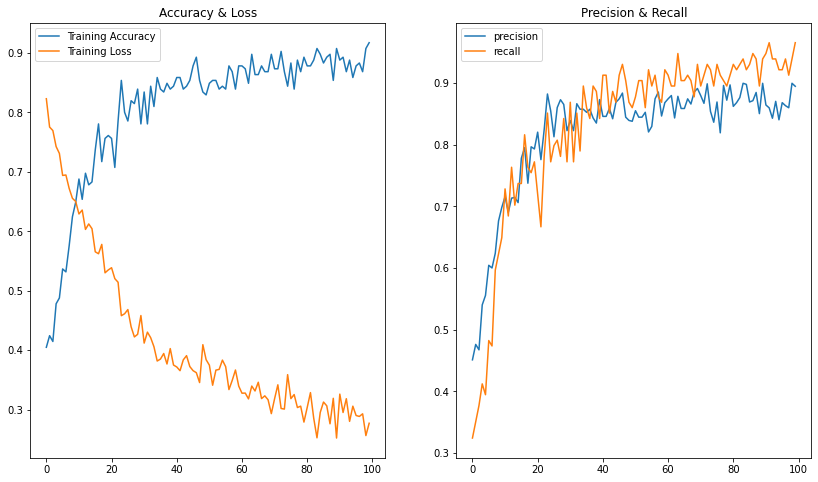

In [43]:
train_acc = training_history.history['accuracy']
train_loss= training_history.history['loss']

precision = training_history.history['precision']
recall = training_history.history['recall']

epochs_range = range(num_epochs)

plt.figure(figsize = (14, 8))

plt.subplot(1,2,1)

plt.plot(epochs_range, train_acc, label = 'Training Accuracy')
plt.plot(epochs_range, train_loss, label = 'Training Loss')

plt.title('Accuracy & Loss')
plt.legend()

plt.subplot(1,2,2)


plt.plot(epochs_range, precision, label = 'precision')
plt.plot(epochs_range, recall, label = 'recall')

plt.title('Precision & Recall')
plt.legend()




In [42]:
score = model.evaluate(x_test, y_test)

score_df = pd.Series(score, index = model.metrics_names)
score_df

2/2 [==============================] - 0s 3ms/step - loss: 0.5758 - accuracy: 0.7377 - precision: 0.7143 - recall: 0.8065


loss         0.575821
accuracy     0.737705
precision    0.714286
recall       0.806452
dtype: float64

In [44]:
y_pred = model.predict(x_test)

In [45]:
y_pred = np.where(y_pred>=0.5, 1, y_pred)
y_pred = np.where(y_pred<0.5, 0, y_pred)

In [46]:
pred_results = pd.DataFrame ({'y_test' : y_test.values.flatten(),
                             'y_pred' : y_pred.flatten().astype('int32')}, index = range(len(y_pred)))

In [ ]:
pd.crosstab(pred_resu)